In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Customer Segmentation

## Import Data

In [61]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


# Data Preprocessing

In [62]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [63]:
df.drop(columns=['CustomerID'],inplace=True)

In [64]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


# Encode the Gender `columns`

In [65]:
df['Gender']=df['Gender'].map({
    "Male":0,
    "Female":1
})

In [66]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81


In [67]:
df.duplicated().sum()

0

# Important
- For visulize the cluster we can get only 2 columns

In [68]:
df.head(1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39


In [69]:
df=df[['Gender','Age']]

# Scale the data

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scale=StandardScaler()
scale_df=scale.fit_transform(df)

In [72]:
scale_df

array([[-1.12815215, -1.42456879],
       [-1.12815215, -1.28103541],
       [ 0.88640526, -1.3528021 ],
       [ 0.88640526, -1.13750203],
       [ 0.88640526, -0.56336851],
       [ 0.88640526, -1.20926872],
       [ 0.88640526, -0.27630176],
       [ 0.88640526, -1.13750203],
       [-1.12815215,  1.80493225],
       [ 0.88640526, -0.6351352 ],
       [-1.12815215,  2.02023231],
       [ 0.88640526, -0.27630176],
       [ 0.88640526,  1.37433211],
       [ 0.88640526, -1.06573534],
       [-1.12815215, -0.13276838],
       [-1.12815215, -1.20926872],
       [ 0.88640526, -0.27630176],
       [-1.12815215, -1.3528021 ],
       [-1.12815215,  0.94373197],
       [ 0.88640526, -0.27630176],
       [-1.12815215, -0.27630176],
       [-1.12815215, -0.99396865],
       [ 0.88640526,  0.51313183],
       [-1.12815215, -0.56336851],
       [ 0.88640526,  1.08726535],
       [-1.12815215, -0.70690189],
       [ 0.88640526,  0.44136514],
       [-1.12815215, -0.27630176],
       [ 0.88640526,

# Applying Clustring

In [73]:
from sklearn.cluster import KMeans

In [74]:
wcss=[]
for i in range(1,21):
    
    k_mean=KMeans(n_clusters=i)
    k_mean.fit(scale_df)
    
    wcss.append(k_mean.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [75]:
import matplotlib.pyplot as plt

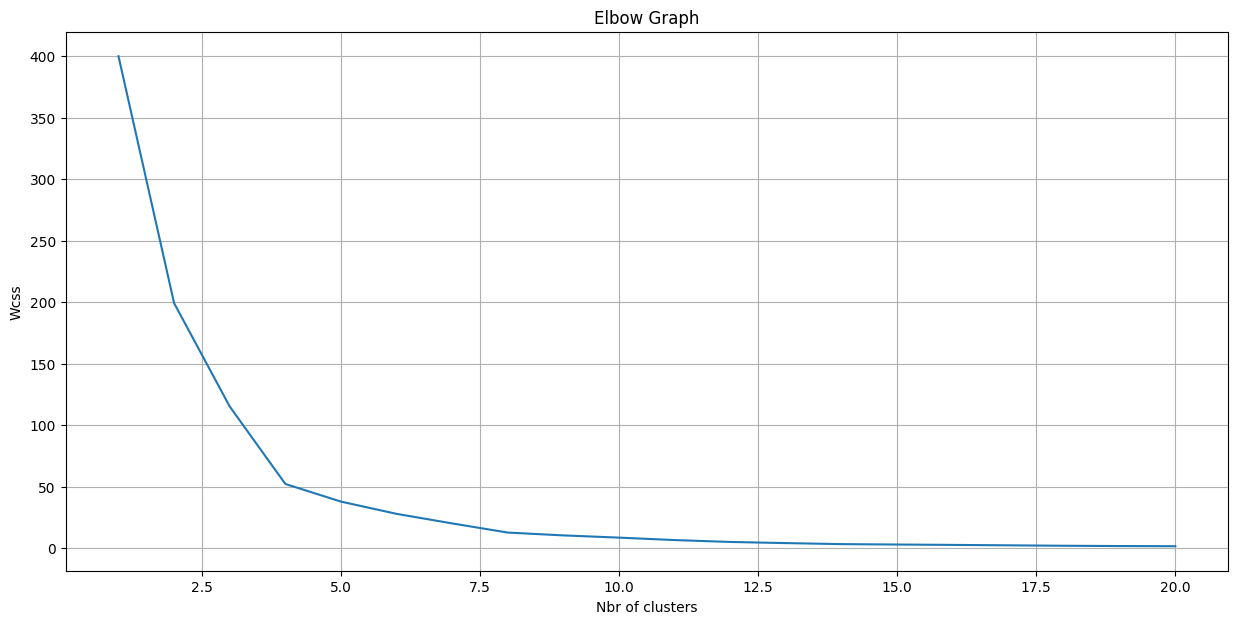

In [76]:
plt.figure(figsize=(15,7))
plt.title("Elbow Graph")
plt.plot(range(1,21),wcss)
plt.xlabel("Nbr of clusters")
plt.ylabel("Wcss")
plt.grid()
plt.show()

In [77]:
k_mean=KMeans(n_clusters=5)
k_mean.fit(scale_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [78]:
label=k_mean.predict(scale_df)
label

array([2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 4, 1, 0, 2, 1, 2, 3, 1, 0, 2,
       4, 2, 4, 2, 4, 0, 1, 1, 3, 1, 3, 2, 4, 1, 4, 1, 1, 1, 4, 2, 0, 1,
       4, 1, 4, 1, 1, 1, 4, 2, 1, 3, 4, 0, 4, 3, 1, 3, 3, 2, 4, 4, 3, 2,
       4, 4, 2, 1, 3, 4, 4, 4, 3, 2, 4, 0, 1, 4, 3, 0, 3, 4, 1, 0, 4, 1,
       1, 4, 4, 2, 0, 1, 1, 2, 4, 1, 0, 2, 1, 4, 3, 2, 0, 1, 4, 3, 3, 3,
       3, 1, 1, 2, 1, 1, 4, 4, 4, 4, 2, 1, 1, 0, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 1, 2, 1, 4, 2, 2, 1, 4, 2, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 4, 1,
       4, 1, 0, 1, 0, 1, 4, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 4, 1,
       3, 2, 3, 0, 1, 1, 0, 1, 1, 2, 4, 2, 1, 1, 1, 1, 2, 1, 4, 1, 4, 2,
       2, 2], dtype=int32)

In [79]:
scale_df[label==0,1]

array([-0.13276838, -0.27630176, -0.27630176,  0.65666521,  0.58489852,
        0.08253169, -0.06100169,  0.65666521,  0.65666521,  0.65666521,
        0.7284319 ,  0.010765  ,  0.29783176,  0.08253169, -0.06100169,
        0.58489852,  0.010765  ,  0.65666521, -0.34806844,  0.29783176,
        0.010765  , -0.13276838, -0.34806844,  0.80019859,  0.22606507,
        0.08253169, -0.20453507, -0.20453507, -0.27630176,  0.51313183])

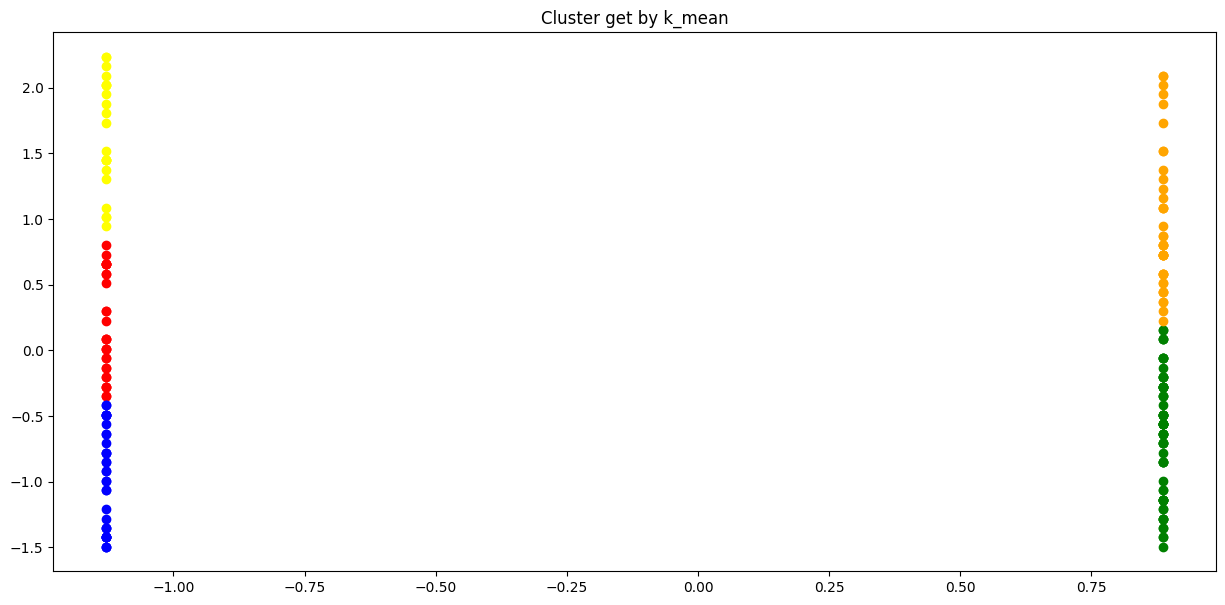

In [80]:
plt.figure(figsize=(15,7))
plt.title("Cluster get by k_mean")
plt.scatter(scale_df[label==0,0],scale_df[label==0,1],color='red')
plt.scatter(scale_df[label==1,0],scale_df[label==1,1],color='green')
plt.scatter(scale_df[label==2,0],scale_df[label==2,1],color='blue')
plt.scatter(scale_df[label==3,0],scale_df[label==3,1],color='yellow')
plt.scatter(scale_df[label==4,0],scale_df[label==4,1],color='orange')
